# Business Case: LoanTap Logistic Regression

# Table of Contents
1. [Introduction](#Introduction)
2. [Problem Statement](#Problem_Statement)
   1.  [Definition of problem](#Definition_of_problem)
3. [Data Description](#DataDescription)
3. [Exploratory-Data-Analysis](#Exploratory-Data-Analysis)
    1. [UnivariateAnalysis](#UnivariateAnalysis)    
        1. [loan_amnt](#loan_amnt)
    2. [Correlation](#Correlation)
4. [Data Preprocessing](#Data_Preprocessing)
    1. [Duplicate value check](#Duplicate_value_check)
    2. [Missing value treatment](#[Missing_value_treatment)
    3. [Outlier treatment](#Outlier_treatment)
    4. [Feature engineering](#Feature_engineering)
    5. [Data preparation for modeling](#Data_preparation_for_modeling)
5. [Model building](#Model_building)
    1. [Logistic Regression model](#Logistic_Regression_model)
        1. [model statistics](#model_statistics)
        2. [model coefficients with column names](#model_coefficients_with_column_names)
6. [Results Evaluation](#Results_Evaluation)
7. [ROC AUC Curve](#ROC_AUC_Curve)
    1. [comments](#ROC_AUC_Curve_comments)
8. [Precision Recall Curve](#Precision_Recall_Curve)
    1. [comments](#ROC_AUC_Curve_comments_comments)
9. [Classification Report](#Classification_Report)
    1. [Confusion Matrix](#Confusion_Matrix)
10. [Questions](#Questions)
    1. [Detection of real defaulters and less false positives](#Q1)
    2. [Dealing with NPA and loans disburse](#Q2)
    2. [Actionable Insights & Recommendations](#Q3)
    
    





 



### Introduction

**Context**:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

### Problem_Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### DataDescription

- **loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **term** : The number of payments on the loan. Values are in months and can be either 36 or 60.
- **int_rate** : Interest Rate on the loan
- **installment** : The monthly payment owed by the borrower if the loan originates.
- **grade** : LoanTap assigned loan grade
- **sub_grade** : LoanTap assigned loan subgrade
- **emp_title** :The job title supplied by the Borrower when applying for the loan.*
- **eemp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **home_ownership** : The home ownership status provided by the borrower during registration or obtained from the credit report.
- **annual_inc** : The self-reported annual income provided by the borrower during registration.
- **verification_status** : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- **issue_d** : The month which the loan was funded

- **purpose** : A category provided by the borrower for the loan request.
- **title** : The loan title provided by the borrower
- **dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- **earliest_cr_line** :The month the borrower's earliest reported credit line was opened
- **open_acc** : The number of open credit lines in the borrower's credit file.
- **pub_rec** : Number of derogatory public records
- **revol_bal** : Total credit revolving balance
- **revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **total_acc** : The total number of credit lines currently in the borrower's credit file
- **initial_list_status** : The initial listing status of the loan. Possible values are – W, F
- **application_type** : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- **mort_acc** : Number of mortgage accounts.
- **pub_rec_bankruptcies** : Number of public record bankruptcies
- **Address**: Address of the individual
- **loan_status**- : Current status of the loan - Target Variable

<center>
    
| Records | Features |
| :-- | :-- |
| 396030 | 27 |


| Id | Features | Description |
| :-- | :--| :--|
|01| **loan_amnt** | numeric|
|02| **term** | Number of months the customer has been with the current telco provider |
|03|**int_rate**|string="area_code_AAA" where AAA = 3 digit area code|


### loan_status

In [25]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

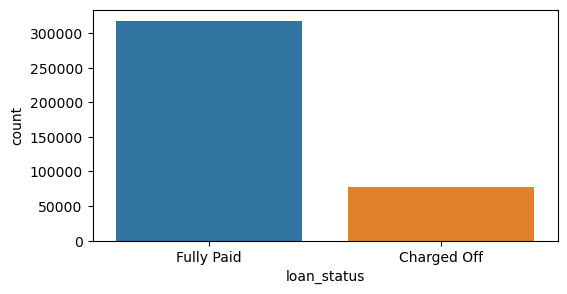

In [32]:
plt.figure(figsize=(6, 3))
sns.countplot(x='loan_status', data=df)

### loan_amnt

<Axes: xlabel='loan_amnt', ylabel='Density'>

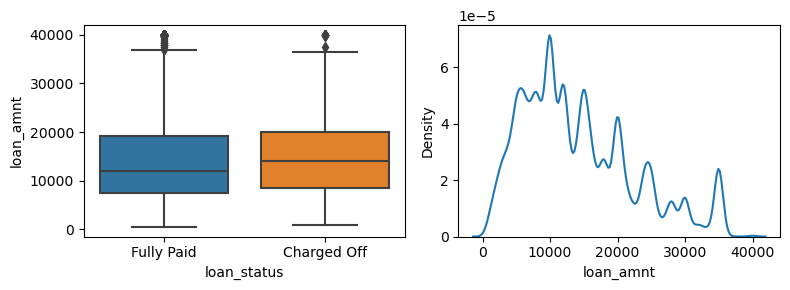

In [20]:
plt.figure(figsize=(8,3), tight_layout=True)
plt.subplot(1,2,1)
sns.boxplot(y='loan_amnt', data=df, x='loan_status')
plt.subplot(1,2,2)
sns.kdeplot(x='loan_amnt', data=df)
